In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
train_data_set = np.load("fashion_train.npy")


# We have 10000 images in the training set
len(train_data_set)

# To find classification for each element, the last value in the set is:
# 0 for T-shirt/top
# 1 for Trousers
# 2 for Pullover
# 3 for Dress
# 4 for Shirt
len(train_data_set[0])

785

In [3]:
# We need to clean the array, as the last value is the classification. Let's first save these separately.

train_classes = []

for i in range(len(train_data_set)):
    train_classes.append(train_data_set[i][784])
      
train_classes = np.array(train_classes)

In [4]:
# Now we can delete the last element and have a cleaned training set that we can work with.

cleaned_train_set = np.empty((len(train_data_set), 784), dtype=np.uint8)

for i in range(len(train_data_set)):
    temp = np.delete(train_data_set[i], 784)
    cleaned_train_set[i] = temp

In [5]:
len(cleaned_train_set[0])

784

In [6]:
# Cleaning values close to 0 to reduce noise in the images.

for i in cleaned_train_set:
    for j in range(784):
        if i[j] < 14:
            i[j] = 0

In [7]:
# Standardize the data
scaler = StandardScaler()
standardized_train_data = scaler.fit_transform(cleaned_train_set)


In [8]:
# We reshape it so that the 1D array becomes a 2D 28x28 array.
cleaned_train_set_reshaped = cleaned_train_set.reshape(-1, 28, 28)

In [9]:
# Two simple functions for working with our data

def show_image(index_num):
    '''
    Simple function for showing the image and printing the category.
    
    index_num: The index you would like to show.
    '''
    img = cleaned_train_set_reshaped[index_num]
    #img2 = np.invert(img)
    plt.imshow(np.invert(img), cmap ='gray', vmin = 0, vmax = 255)
    plt.show()

    cloth_cat = train_classes[index_num]
    if cloth_cat == 0:
        print("0: This is a t-shirt/top")
    if cloth_cat == 1:
        print("1: This is a pair of trousers")
    if cloth_cat == 2:
        print("2: This is a pullover")
    if cloth_cat == 3:
        print("3: This is a dress")
    if cloth_cat == 4:
        print("4: This is a shirt")
        
def count_categories(categories):
    '''
    Another stupidly simple function for counting the categories.
    
    categories: The numpy array of all categories, corresponding to index number.
    '''  
    ze_val = 0
    on_val = 0
    tw_val = 0
    th_val = 0
    fo_val = 0
    for i in categories:
        if i == 0:
            ze_val += 1
        if i == 1:
            on_val += 1
        if i == 2:
            tw_val += 1
        if i == 3:
            th_val += 1
        if i == 4:
            fo_val += 1
    
    print(f'There are {ze_val} t-shirts/tops. There are {on_val} pairs of trousers. There are {tw_val} pullovers. There are {th_val} dresses. There are {fo_val} shirts.')
    

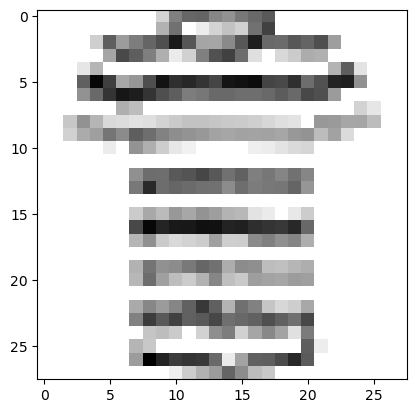

0: This is a t-shirt/top
There are 2033 t-shirts/tops. There are 1947 pairs of trousers. There are 2001 pullovers. There are 2005 dresses. There are 2014 shirts.


In [10]:
show_image(55)

count_categories(train_classes)

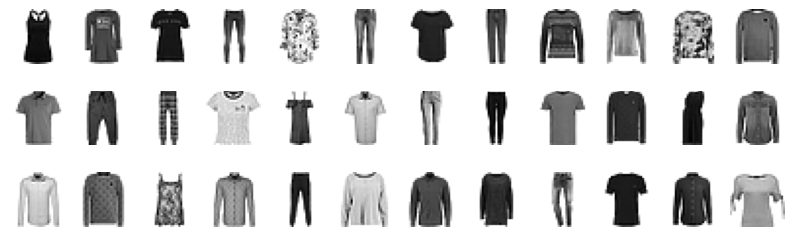

In [11]:
fig, axarr = plt.subplots( 3, 12, figsize=(10, 3))
ax = plt.Axes(fig, [0, 0, 1, 1.])
for y, a in enumerate(axarr[1]):
    axarr[0,y].set_axis_off()
    axarr[1,y].set_axis_off()
    axarr[2,y].set_axis_off()
    axarr[0,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[1,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[2,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')

In [12]:
cleaned_train_set_reshaped.shape

(10000, 28, 28)

Transformed data shape: (10000, 210)
Explained variance ratio: [0.22603368 0.13609817 0.06358945 0.05010653 0.03062702 0.02909299
 0.02197392 0.01885609 0.01473657 0.01421748 0.01296357 0.0123481
 0.01009283 0.00926477 0.00884594 0.00841715 0.00791795 0.00741845
 0.00719492 0.00682203 0.00638955 0.0062316  0.00593573 0.00557688
 0.005205   0.0050137  0.00493918 0.00478883 0.00455162 0.0044037
 0.00420612 0.00405006 0.00396849 0.00389328 0.00379286 0.00364704
 0.00359468 0.00354001 0.00334749 0.00325407 0.00318967 0.00314184
 0.00302833 0.00292203 0.00276837 0.00273281 0.00264286 0.00259014
 0.00245174 0.0024481  0.00234343 0.00230503 0.00221795 0.00216621
 0.00212285 0.00205767 0.002036   0.0019688  0.00193612 0.00186013
 0.00184001 0.00179804 0.00176936 0.00172659 0.00168418 0.00165854
 0.00163789 0.00159424 0.00158617 0.00152982 0.00149227 0.00148737
 0.00147779 0.00146116 0.00143459 0.00142943 0.00141072 0.00137028
 0.00134998 0.00133313 0.00130898 0.00128262 0.00126816 0.00126208
 

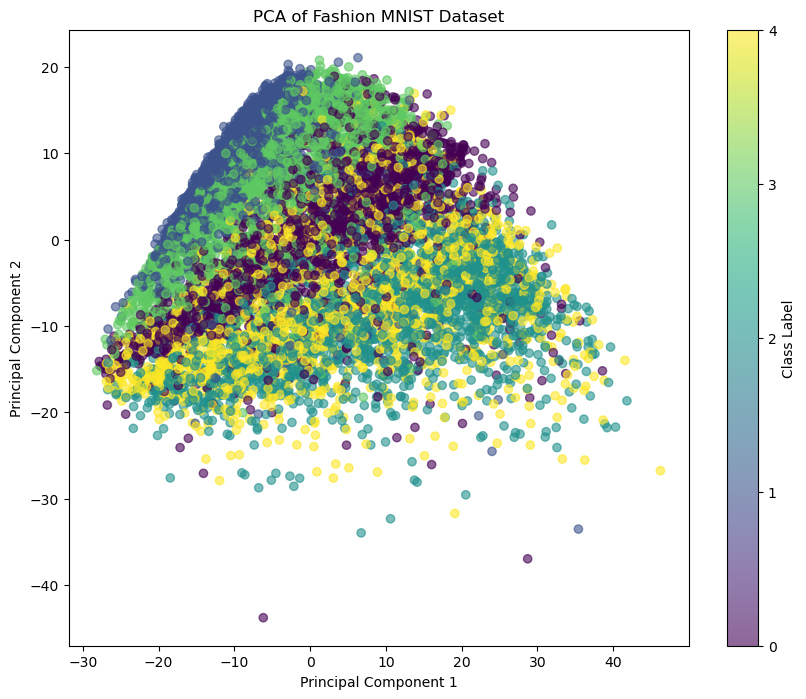

In [13]:

# Perform PCA
pca = PCA(n_components=210)  # You can adjust this number if needed
pca_train_result = pca.fit_transform(standardized_train_data)

# Print the shapes and explained variance ratio
print("Transformed data shape:", pca_train_result.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize the first two principal components
pca_2d = pca_train_result[:, :2]  # Get the first two components

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=train_classes, cmap='viridis', alpha=0.6)

# Add colorbar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()


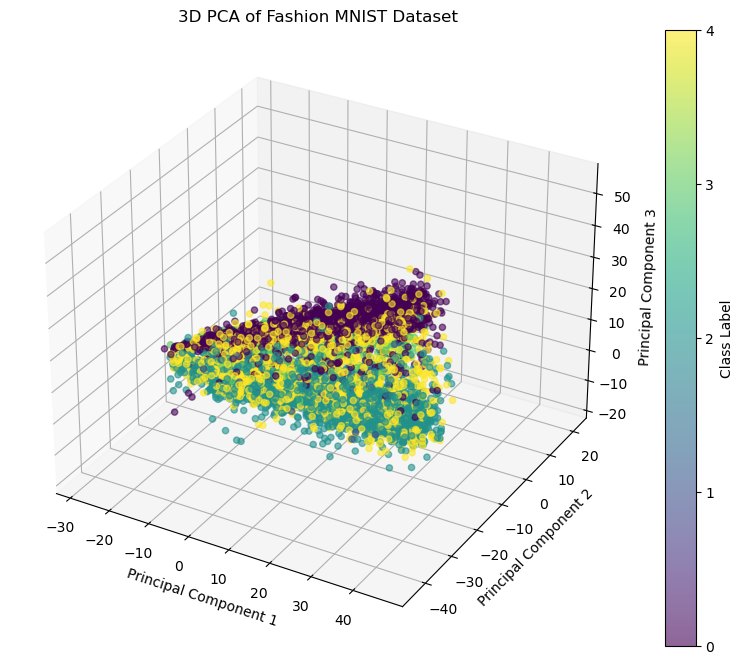

In [14]:
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Get the first three principal components
pca_3d = pca_train_result[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=train_classes, cmap='viridis', alpha=0.6)

# Add a color bar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()

In [15]:
import numpy as np
import pandas as pd

from scipy import stats
import pandas as pd
import numpy as np
z = np.abs(stats.zscore(pca_2d))
print(z)



threshold_z = 2

# Example DataFrame of PCA results (assumed as input)
df = pd.DataFrame(pca_2d)

# Find indices of outliers
outlier_indices = np.where(z > threshold_z)[0]

# Remove outliers from the DataFrame
no_outliers = df.drop(outlier_indices)

# Convert train_classes to a numpy array if not already done
train_classes = np.array([train_data_set[i][784] for i in range(len(train_data_set))])

# Remove the same indices from train_classes
train_classes_no_outliers = np.delete(train_classes, outlier_indices)

# Display the shapes before and after
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)
print("Original train_classes Shape:", train_classes.shape)
print("train_classes Shape after Removing Outliers:", train_classes_no_outliers.shape)


[[0.03984411 0.24307299]
 [1.36106243 0.02306705]
 [0.40330591 0.22890524]
 ...
 [0.3212629  1.46930106]
 [0.04177596 0.11284096]
 [0.66575125 0.27348265]]
Original DataFrame Shape: (10000, 2)
DataFrame Shape after Removing Outliers: (9600, 2)
Original train_classes Shape: (10000,)
train_classes Shape after Removing Outliers: (9600,)


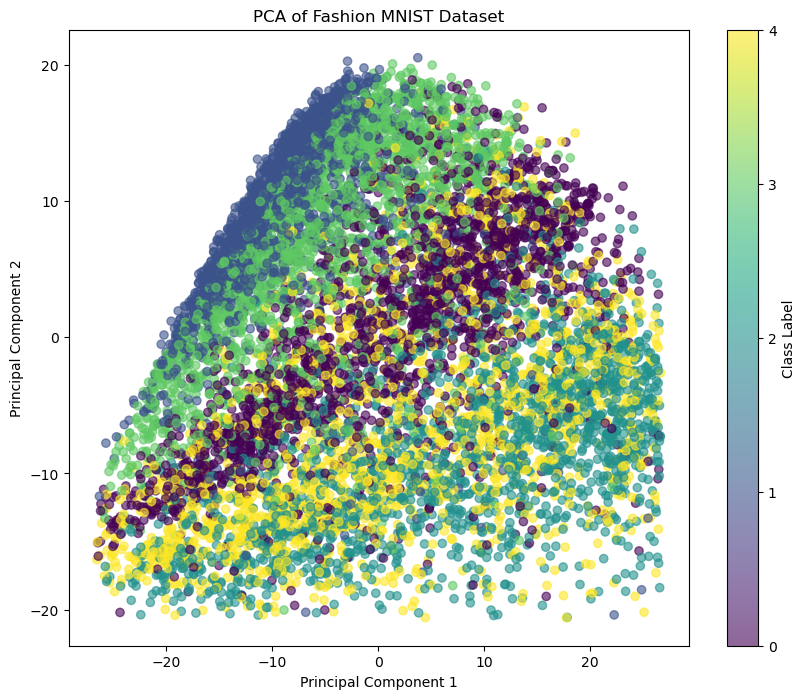

In [16]:
no_out = pd.DataFrame(no_outliers).to_numpy()


# Visualize the first two principal components
pca_2d = no_out[:, :2]  # Get the first two components

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=train_classes_no_outliers, cmap='viridis', alpha=0.6)

# Add colorbar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()


In [17]:
import numpy as np
import pandas as pd

from scipy import stats
import pandas as pd
import numpy as np
z3 = np.abs(stats.zscore(pca_3d))
print(z3)



threshold_z3 = 2

# Example DataFrame of PCA results (assumed as input)
df3 = pd.DataFrame(pca_3d)

# Find indices of outliers
outlier3_indices = np.where(z3 > threshold_z3)[0]

# Remove outliers from the DataFrame
no_outliers3 = df3.drop(outlier3_indices)

# Convert train_classes to a numpy array if not already done
train_classes3 = np.array([train_data_set[i][784] for i in range(len(train_data_set))])

# Remove the same indices from train_classes
train_classes_no_outliers3 = np.delete(train_classes3, outlier3_indices)

# Display the shapes before and after
print("Original DataFrame Shape:", df3.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers3.shape)
print("Original train_classes Shape:", train_classes3.shape)
print("train_classes Shape after Removing Outliers:", train_classes_no_outliers3.shape)


[[0.03984411 0.24307299 1.19857487]
 [1.36106243 0.02306705 0.2688967 ]
 [0.40330591 0.22890524 1.44216003]
 ...
 [0.3212629  1.46930106 0.20007884]
 [0.04177596 0.11284096 0.966994  ]
 [0.66575125 0.27348265 0.43424878]]
Original DataFrame Shape: (10000, 3)
DataFrame Shape after Removing Outliers: (9194, 3)
Original train_classes Shape: (10000,)
train_classes Shape after Removing Outliers: (9194,)


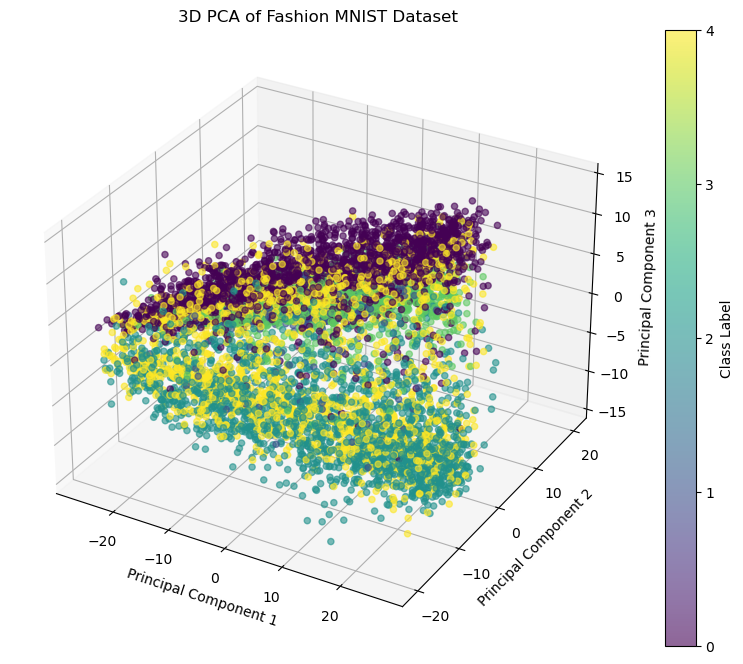

In [20]:
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

no_out3 = pd.DataFrame(no_outliers3).to_numpy()


# Get the first three principal components
pca_3d = no_out3[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=train_classes_no_outliers3, cmap='viridis', alpha=0.6)

# Add a color bar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()

In [ ]:
no_out3

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

no_out3 = pd.DataFrame(no_outliers3).to_numpy()

# Get the first three principal components
pca_3d = no_out3[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], c=train_classes, cmap='viridis', alpha=0.6)

# Add a color bar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()